In [1]:
import numpy as np
import mmh3
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
root = os.getcwd()
df = pd.read_csv(root + "/clean_sample_data.csv")
corpus_train = []
corpus_test = []
y_train = []
y_test = []
corpus_train_rating = []
corpus_test_rating = []
for rating in [1,3,5]:
    corpus = np.asarray(df['Clean_Review'].loc[df['overall'] == rating])
    label = np.asarray(df['overall'].loc[df['overall'] == rating])
    split = int(len(corpus)*0.8)
    corpus_train_rating.append(corpus[:split])
    corpus_test_rating.append(corpus[split:])
    corpus_train.extend(corpus[:split])
    corpus_test.extend(corpus[split:])
    y_train.extend(label[:split])
    y_test.extend(label[split:])

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = []
vocab = np.array([])
for i in [1,3,5]:
    vectorizer.append(CountVectorizer(max_features=100, stop_words='english'))
    vectorizer[i].fit(corpus_train_rating[i])
    vocab = np.append(vocab, vectorizer[i].get_feature_names_out())
vocab = np.unique(vocab)

In [4]:
vectorizer = CountVectorizer(vocabulary=vocab)
X_train = vectorizer.transform(corpus_train)
X_test = vectorizer.transform(corpus_test)

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(X_train)
y_pred_train = kmeans.labels_+1
acc = accuracy_score(y_train, y_pred_train)
acc

0.21551394726786396

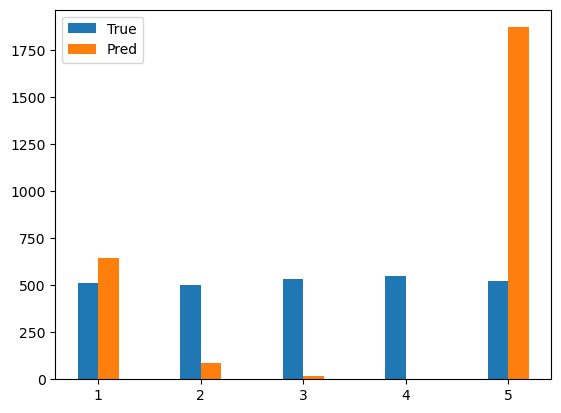

In [9]:
from collections import Counter

true_freq = Counter(y_train)
pred_freq = Counter(y_pred_train)
true_x = list(true_freq.keys())-0.1*np.ones(len(true_freq))
pred_x = list(pred_freq.keys())+0.1*np.ones(len(pred_freq))

plt.bar(true_x, true_freq.values(), width=0.2, label="True")
plt.bar(pred_x, pred_freq.values(), width=0.2, label="Pred")
plt.legend()
plt.show()


[1.0, 2.0, 3.0, 4.0, 5.0]

In [82]:
true_freq.keys()

dict_keys([1.0, 2.0, 3.0, 4.0, 5.0])

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = [TfidfVectorizer(max_features=100) for i in range(5)]
X = [vectorizer[i].fit_transform(corpus[i]) for i in range(5)]

In [31]:
vectorizer[0].get_feature_names_out()

array(['also', 'amazon', 'another', 'back', 'bad', 'buy', 'call', 'cant',
       'change', 'come', 'computer', 'could', 'customer', 'data', 'day',
       'dont', 'download', 'drive', 'error', 'even', 'every', 'feature',
       'file', 'find', 'first', 'fix', 'free', 'get', 'give', 'go',
       'good', 'help', 'hour', 'im', 'instal', 'install', 'internet',
       'intuit', 'know', 'like', 'look', 'mac', 'make', 'many',
       'microsoft', 'money', 'much', 'need', 'never', 'new', 'norton',
       'office', 'old', 'one', 'pay', 'pc', 'people', 'problem',
       'product', 'program', 'purchase', 'quicken', 'really', 'review',
       'run', 'say', 'security', 'see', 'since', 'slow', 'software',
       'start', 'still', 'support', 'system', 'take', 'tax', 'tell',
       'thing', 'think', 'time', 'try', 'turbotax', 'two', 'update',
       'upgrade', 'use', 'user', 'version', 'virus', 'vista', 'want',
       'way', 'well', 'window', 'windows', 'work', 'would', 'xp', 'year'],
      dtype=object

In [32]:
X

[<640x100 sparse matrix of type '<class 'numpy.float64'>'
 	with 12335 stored elements in Compressed Sparse Row format>,
 <629x100 sparse matrix of type '<class 'numpy.float64'>'
 	with 13461 stored elements in Compressed Sparse Row format>,
 <665x100 sparse matrix of type '<class 'numpy.float64'>'
 	with 14881 stored elements in Compressed Sparse Row format>,
 <688x100 sparse matrix of type '<class 'numpy.float64'>'
 	with 14983 stored elements in Compressed Sparse Row format>,
 <650x100 sparse matrix of type '<class 'numpy.float64'>'
 	with 8705 stored elements in Compressed Sparse Row format>]